In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('revenue_income.csv')

In [4]:
df

,Unnamed: 0,Quarter,Revenue,Net Income
0,0,2020-03-31,75452,2535
1,1,2019-12-31,87437,3268
2,2,2019-09-30,69981,2134
3,3,2019-06-30,63404,2625
4,4,2019-03-31,59700,3561
...,...,...,...,...
56,56,2006-03-31,2279,51
57,57,2005-12-31,2977,199
58,58,2005-09-30,1858,30
59,59,2005-06-30,1753,52


In [5]:
df.index = pd.to_datetime(df['Quarter'])

In [6]:
df

,Unnamed: 0,Quarter,Revenue,Net Income
Quarter,,,,
2020-03-31,0,2020-03-31,75452,2535
2019-12-31,1,2019-12-31,87437,3268
2019-09-30,2,2019-09-30,69981,2134
2019-06-30,3,2019-06-30,63404,2625
2019-03-31,4,2019-03-31,59700,3561
...,...,...,...,...
2006-03-31,56,2006-03-31,2279,51
2005-12-31,57,2005-12-31,2977,199
2005-09-30,58,2005-09-30,1858,30


<AxesSubplot:xlabel='Quarter'>

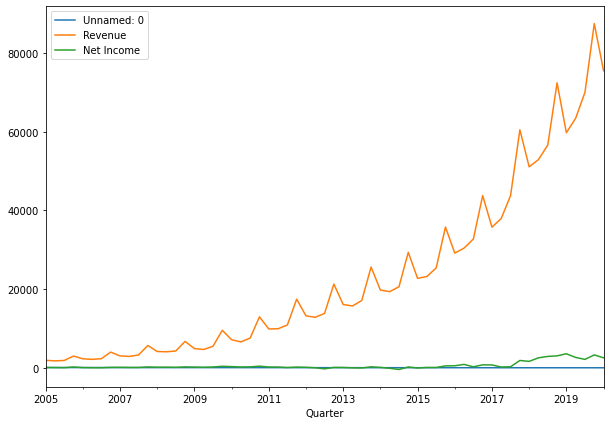

In [7]:
df.plot(figsize=(10,7))

array([<AxesSubplot:xlabel='Quarter'>, <AxesSubplot:xlabel='Quarter'>,
       <AxesSubplot:xlabel='Quarter'>], dtype=object)

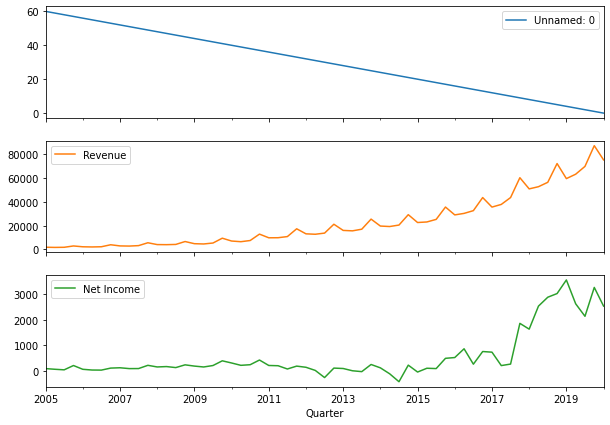

In [8]:
df.plot(subplots=True,figsize=(10,7))

## KPSS test

- Null Hypothesis : Series is stationary

- Alternate  Hypothesis : Series is non-stationary

In [9]:
from statsmodels.tsa.stattools import adfuller,kpss 

In [11]:
_,p,_,_ = kpss(df['Revenue'],"ct")

c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [12]:
print(f"p-value is: {p}" )


if p<0.05:
    print("Null hypothesies rejected")
    print("Data is not stationary")

else:
    print("Null hypothesies accepted")
    print("Data is stationary")

p-value is: 0.029956931576409152
Null hypothesies rejected
Data is not stationary


In [14]:
_,p,_,_ = kpss(df['Net Income'],"c")


print(f"p-value is: {p}" )


if p<0.05:
    print("Null hypothesies rejected")
    print("Data is not stationary")

else:
    print("Null hypothesies accepted")
    print("Data is stationary")

p-value is: 0.07401601875918251
Null hypothesies accepted
Data is stationary


## ADF test

- Null Hypothesis: Time series is not stationary

- Alternate Hypothesis: Time series is stationary 

In [18]:
p = adfuller(df["Revenue"])[1]

In [20]:
print(f"p value is {p}")
if p<0.05:
    print("Null hypothesies rejected")
    print("Data is stationary")

else:
    print("Null hypothesies accepted")
    print("Data is not stationary")

p value is 0.12947943121838879
Null hypothesies accepted
Data is not stationary


## Decomposing time series into components:

ts = trend+seasonality+residual 

In [22]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [23]:
import statsmodels.api as sm


In [30]:
res = sm.tsa.seasonal_decompose(df['Revenue'],model='multiplicative')

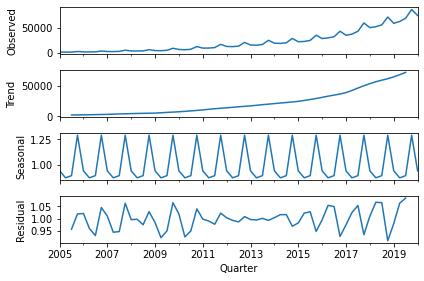

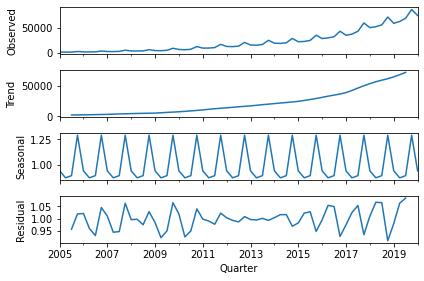

In [31]:
res.plot()

<AxesSubplot:xlabel='Quarter'>

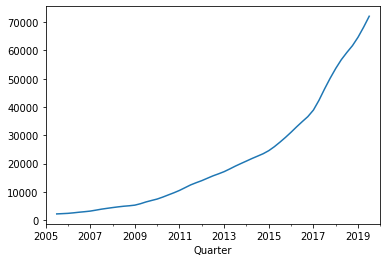

In [32]:
res.trend.plot()

<AxesSubplot:xlabel='Quarter'>

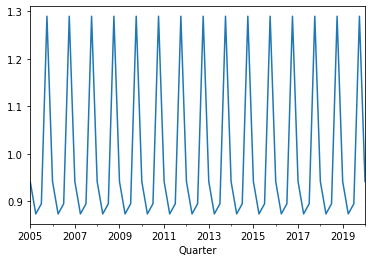

In [33]:
res.seasonal.plot()

# Observed = trend*seasonality +residual 

# observed = trend+seasonality +residual 


<AxesSubplot:xlabel='Quarter'>

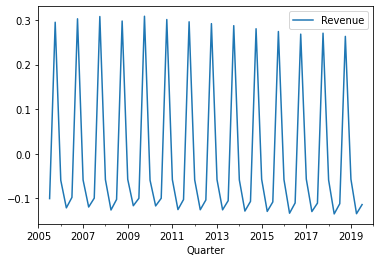

In [35]:
pd.DataFrame(res.observed/res.trend - res.resid).plot()